In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [5]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
iris_frame

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8               3.4                1.6               0.2   
12                 4.8               3.0                1.4               0.1   
13                 4.3               3.0                1.1               0.1   
14                 5.8               4.0                1.2               0.2   
15                 5.7               4.4                1.5               0.4   
16                 5.4               3.9                1.3               0.4   
17                 5.1               3.5                1.4               0.3   
18                 5.7               3.8                1.7               0.3   
19                 5.1               3.8                1.5               0.3   
20                 5.4               3.4                1.7               0.2   
21                 5.1               3.7                1.5               0.4   
22                 4.6               3.6                1.0               0.2   
23                 5.1               3.3                1.7               0.5   
24                 4.8               3.4                1.9               0.2   
25                 5.0               3.0                1.6               0.2   
26                 5.0               3.4                1.6               0.4   
27                 5.2               3.5                1.5               0.2   
28                 5.2               3.4                1.4               0.2   
29                 4.7               3.2                1.6               0.2   
..                 ...               ...                ...               ...   
120                6.9               3.2                5.7               2.3   
121                5.6               2.8                4.9               2.0   
122                7.7               2.8                6.7               2.0   
123                6.3               2.7                4.9               1.8   
124                6.7               3.3                5.7               2.1   
125                7.2               3.2                6.0               1.8   
126                6.2               2.8                4.8               1.8   
127                6.1               3.0                4.9               1.8   
128                6.4               2.8                5.6               2.1   
129                7.2               3.0                5.8               1.6   
130                7.4               2.8                6.1               1.9   
131                7.9               3.8                6.4               2.0   
132                6.4               2.8                5.6               2.2   
133                6.3               2.8                5.1               1.5   
134                6.1               2.6                5.6               1.4   
135                7.7               3.0                6.1               2.3   
136                6.3               3.4                5.6               2.4   
137                6.4              

In [15]:
## 밑의 'linear'를 변경해서 모델을 다르게 학습시킬 수 있다.

clf = svm.SVC(kernel = 'linear')


import matplotlib.colors as colors
df1 = iris_frame[["sepal length (cm)","sepal width (cm)","target"]]
X= df1.iloc[:,0:2]
Y= df1.iloc[:,2].replace({'setosa' : 0,
                          'versicolor':1,
                          'virginica':2}).copy()
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


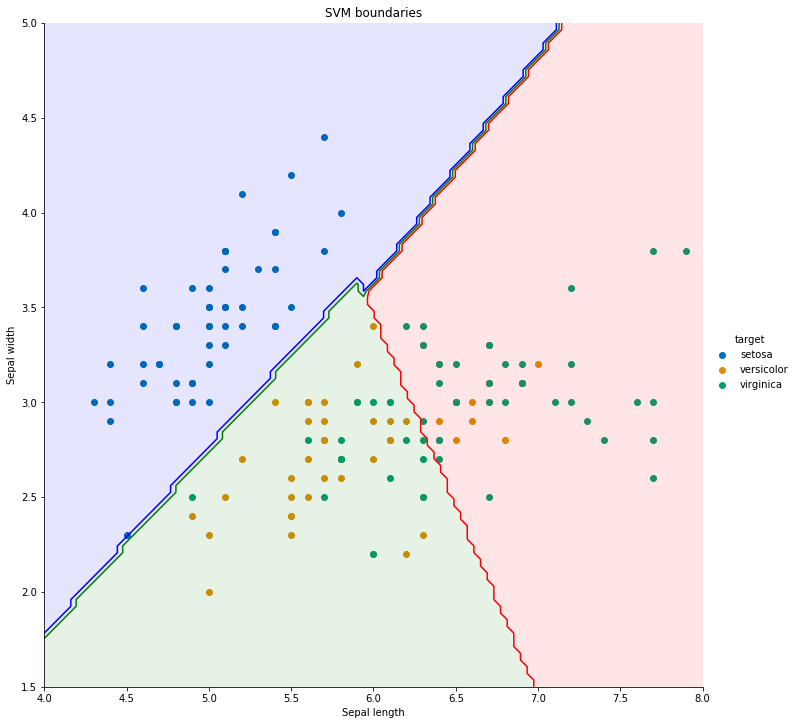

In [20]:
import seaborn as sn

N = 100
X_ = np.linspace(4,8, N)
Y_ = np.linspace(1.5,5, N)
X_,Y_=np.meshgrid(X_, Y_)
color_list = ["Blues, Greens, Reds"]
my_norm = colors.Normalize(vmin = -1, vmax = 1.)
g = sn.FacetGrid(iris_frame,hue = "target", 
                 size= 10, 
                 palette = "colorblind").map(plt.scatter, 
                                             "sepal length (cm)",
                                            "sepal width (cm)",).add_legend()

my_ax = g.ax
zz =  np.array( [clf.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries')


plt.show()